Loaded Model from disk


C:\Users\COEGIN\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


[23]
[[0.12193865 0.01363505 0.03253501 0.00333583 0.00094991 0.00111741
  0.00343829 0.02136581 0.00320886 0.0030467  0.02200899 0.00398001
  0.00655213 0.00278748 0.00690881 0.0251913  0.01240278 0.0025252
  0.06050749 0.00357584 0.00063504 0.01250351 0.00163364 0.26094726
  0.03008298 0.05135195 0.06098864 0.16538167 0.0015657  0.01135262
  0.0006197  0.00060161 0.01455082 0.02648866 0.00248307 0.00780163]] []


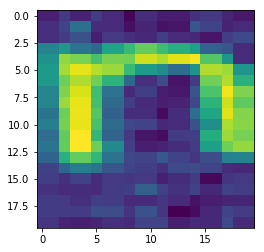

In [64]:
from collections import Counter

import numpy as np
import keras.models
from keras.models import model_from_json
from scipy.misc import imread, imresize,imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline
import helpers

json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#load woeights into new model
loaded_model.load_weights("model.h5")
print("Loaded Model from disk")

#compile and evaluate loaded model
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
# loss,accuracy = loaded.model.evaluate(X_test,y_test)
# print('loss:', loss)
# print('accuracy:', accuracy)
x = Image.open('testgray/character160.png')
x = np.invert(x)
x = imresize(x,(20,20))
plt.imshow(x)
data = np.asarray(x)
# x = x.convert('L')
x = x.reshape(1,20,20,1)


out = loaded_model.predict(x)
value_list1 = []

for pred in out:
    i = 0
    for value in pred:
        if value > 0.9:
            value_list1.append(helpers.num_to_char(i))

        i += 1
        
print((np.argmax(out,axis=1)))
print(out,value_list1)
# print(data)